In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv("/content/Smote_dairy_dataset.csv")

In [ ]:
df['New Farm Size'] = df['Farm Size'].apply(lambda x: 0 if x == "Small" else 1)

In [ ]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4325 entries, 0 to 4324
Data columns (total 25 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Unnamed: 0                           4325 non-null   int64  
 1   Location                             4325 non-null   object 
 2   Total Land Area (acres)              4325 non-null   float64
 3   Number of Cows                       4325 non-null   int64  
 4   Farm Size                            4325 non-null   object 
 5   Date                                 4325 non-null   object 
 6   Product ID                           4325 non-null   int64  
 7   Product Name                         4325 non-null   object 
 8   Brand                                4325 non-null   object 
 9   Quantity (liters/kg)                 4325 non-null   float64
 10  Price per Unit                       4325 non-null   float64
 11  Total Value                   

In [ ]:
X = df.iloc[:,22:-1]
y = df.iloc[:,-1]
y

0       1
1       1
2       1
3       0
4       1
       ..
4320    1
4321    1
4322    0
4323    0
4324    1
Name: New Farm Size, Length: 4325, dtype: int64

In [ ]:
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE


 # split into 70:30 ration
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

# describes info about train and test set
print("Number transactions X_train dataset: ", X_train.shape)
print("Number transactions y_train dataset: ", y_train.shape)
print("Number transactions X_test dataset: ", X_test.shape)
print("Number transactions y_test dataset: ", y_test.shape)

Number transactions X_train dataset:  (3027, 2)
Number transactions y_train dataset:  (3027,)
Number transactions X_test dataset:  (1298, 2)
Number transactions y_test dataset:  (1298,)


In [ ]:
# df.to_csv("Smote_dairy_dataset.csv")

In [ ]:
print("Before OverSampling, counts of label '1': {}".format(sum(y_train == 1)))
print("Before OverSampling, counts of label '0': {} \n".format(sum(y_train == 0)))

from imblearn.over_sampling import SMOTE
# pip install imblearn (if you don't have imblearn in your system)
# from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state = 2)
X_train_res, y_train_res = sm.fit_resample(X_train, y_train)

print('After OverSampling, the shape of train_X: {}'.format(X_train_res.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(y_train_res.shape))

print("After OverSampling, counts of label '1': {}".format(sum(y_train_res == 1)))
print("After OverSampling, counts of label '0': {}".format(sum(y_train_res == 0)))


Before OverSampling, counts of label '1': 2053
Before OverSampling, counts of label '0': 974 

After OverSampling, the shape of train_X: (4106, 2)
After OverSampling, the shape of train_y: (4106,) 

After OverSampling, counts of label '1': 2053
After OverSampling, counts of label '0': 2053


In [ ]:
#Before
Before_Label_0 = sum(y_train == 0)
Before_Label_1 = sum(y_train == 1)

#After
After_Label_0 = sum(y_train_res == 0)
After_Label_1 = sum(y_train_res == 1)

print("Before: ",Before_Label_0,Before_Label_1,"\nAfter :",After_Label_0,After_Label_1)

Before:  974 2053 
After : 2053 2053


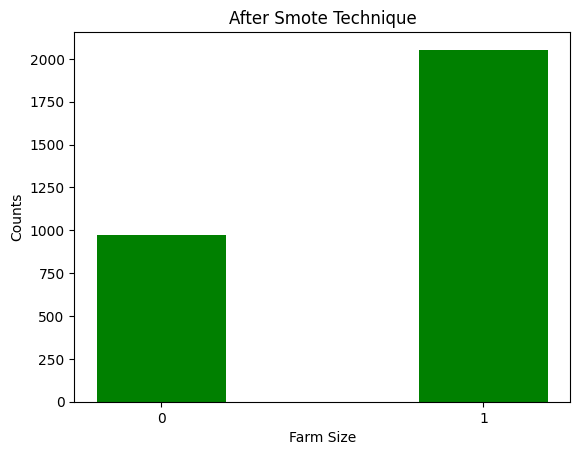

In [ ]:

import numpy as np
import matplotlib.pyplot as plt


# creating the dataset
data = {'0':Before_Label_0, '1':Before_Label_1}
courses = list(data.keys())
values = list(data.values())

# fig = plt.figure()

# creating the bar plot
plt.bar(courses, values, color ='green',
        width = 0.4)

plt.xlabel("Farm Size")
plt.ylabel("Counts")
plt.title("After Smote Technique")
# plt.legend()
plt.show()

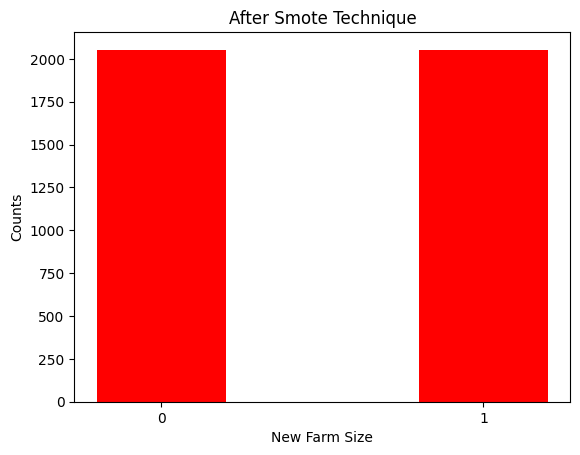

In [ ]:
# Visualization  After
import numpy as np
import matplotlib.pyplot as plt


# creating the dataset
data = {'0':After_Label_0, '1':After_Label_1}
courses = list(data.keys())
values = list(data.values())

# fig = plt.figure()

# creating the bar plot
plt.bar(courses, values, color ='red',
        width = 0.4)

plt.xlabel("New Farm Size")
plt.ylabel("Counts")
plt.title("After Smote Technique")
# plt.legend()
plt.show()